## Regression(회귀)

### Linear Regression (선형 회귀)
* 단순 선형 회귀: 하나의 특성(설명 변수(explanatory variable) ```x```)과 연속적인 타깃(응답 변수(response variable) ```y```) 사이의 관계를 모델링.

<center>

$y={w_1} x + b$

</center>

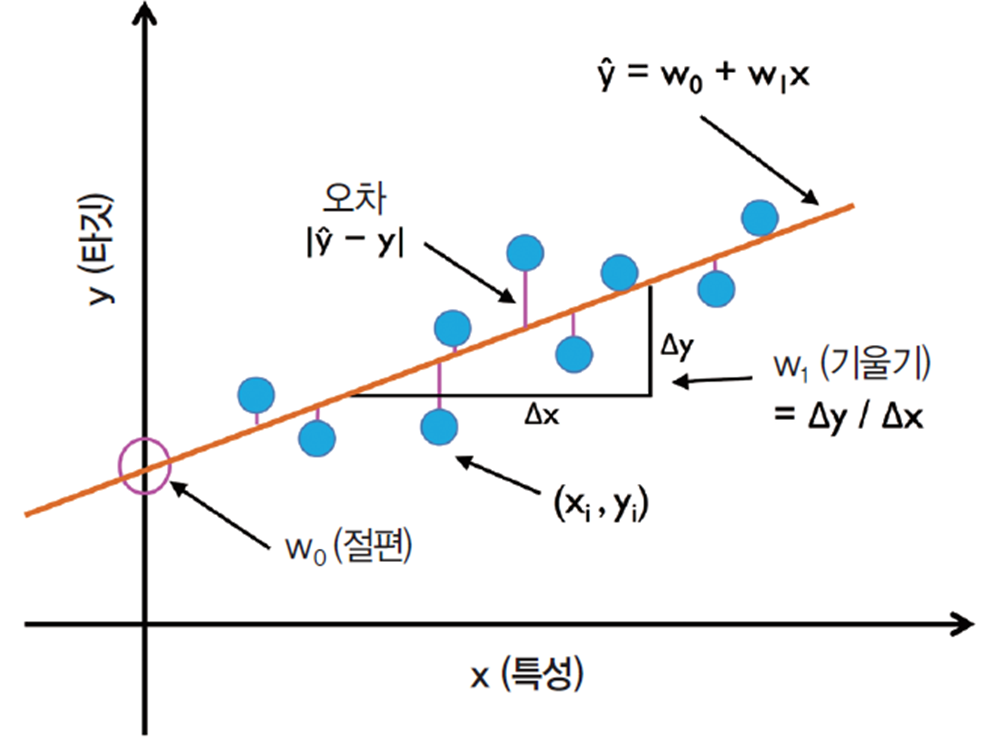

- 회귀 직선(regression line)
- 오프셋(offset), 잔차(residual): 회귀 직선과 훈련 샘플 사이의 직선 거리


* 다중 선형 회귀: 여러 개의 특성이 있는 경우로 일반화

<center>

$y={w_1}{x_1} + ... + {w_m}{x_m} + b = w^T x + b$

</center>

* 손실 함수: 일반적으로 평균 제곱 오차 (Mean Squared Error, MSE) 사용

<center>

$L(w,b)= \sum_{i=1}^{n} (y^{(i)}-\hat{y}^{(i)})^2$

$\hat{w}= \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i -\bar{x})^2}$

$\hat{b} = \bar{y}-\hat{w} \bar{x}$

</center>


#### 실습

##### 에임스 주택 데이터셋 탐색

- `'Overall Qual'`: 주택의 전반적인 건축 재료와 마감에 대한 등급

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

- `'Overall Cond'`: 주택의 전반적인 상태에 대한 등급

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: 평방 피트(square feet) 단위의 (지상) 거실 면적
- `'Central Air'`: 중앙 에어컨

       N	No
       Y	Yes

- `'Total Bsmt SF'`: 평방 피트 단위의 지하실 총 면적
- `'SalePrice'`: 판매 가격(미국 달러)

In [1]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

In [3]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [4]:
# 누락된 값을 포함하고 있는 행을 삭제합니다
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

##### 사이킷런으로 회귀 모델의 가중치 추정

* scikit-learn(사이킷런): 다양한 머신러닝 모델과 데이터 처리 기능을 제공하는 파이썬 라이브러리.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [7]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'기울기: {slr.coef_[0]:.3f}')
print(f'절편: {slr.intercept_:.3f}')

기울기: 111.666
절편: 13342.979


**정규 방정식으로 가중치 구하기**

$\hat{w}= \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i -\bar{x})^2}$

$\hat{b} = \bar{y}-\hat{w} \bar{x}$

In [8]:
import numpy as np

In [9]:
x_mean = np.mean(X)
y_mean = np.mean(y)

In [10]:
x = X.reshape(y.shape)
w = np.sum(np.multiply(x-x_mean,y-y_mean))/np.sum(np.multiply(x-x_mean,x-x_mean))
b = y_mean - w * x_mean
print(w,b)

111.66625842136442 13342.978662354784


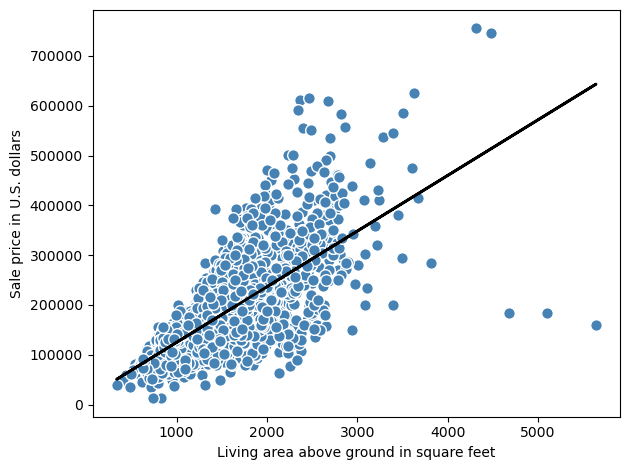

In [11]:
import matplotlib.pyplot as plt

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

##### 선형 회귀 모델의 성능 평가

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [13]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE 훈련: {mse_train:.2f}')
print(f'MSE 테스트: {mse_test:.2f}')

MSE 훈련: 3206362445.63
MSE 테스트: 3168407415.32


In [15]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE 훈련: {mae_train:.2f}')
print(f'MAE 테스트: {mae_test:.2f}')

MAE 훈련: 38758.60
MAE 테스트: 38345.12


In [16]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 훈련: {r2_train:.2f}')
print(f'R^2 테스트: {r2_test:.2f}')

R^2 훈련: 0.51
R^2 테스트: 0.48


In [ ]:
## 실습
# 'Overall Qual' 특성을 사용하여 주택 가격을 예측하는 선형 회귀 모델을 훈련하고 평가하세요.
# 훈련 및 테스트 세트에 대한 MSE, MAE, R² 점수를 계산하세요.